In [1]:
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 데이터 분석을 위한 데이터 준비 과정
## 데이터를 읽고 row, column 확인하기
### 팀원
- 201904128 홍윤기
- 201904065 오세현

In [2]:
# 데이터 분석에 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime # datetime을 정렬하기위함

In [3]:
'''
# 데이터 참고 출처
@misc{willden,
url={http://theconceptcenter.com/simple-research-study-udemy-courses/},
journal={Concept Center},
author={Willden, Chase}}
'''

'\n# 데이터 참고 출처\n@misc{willden,\nurl={http://theconceptcenter.com/simple-research-study-udemy-courses/},\njournal={Concept Center},\nauthor={Willden, Chase}}\n'

In [4]:
# 분석할 데이터 읽어오고 보여주기
course = pd.read_csv('data/udemy_courses.csv')
course

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [5]:
course.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
# 기초 통계값(수치형) 분석
# 혹시 몰라서.. count: column 갯수 / mean: column 평균 / std: column 표준편차
course.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


## 데이터 메모리 최적화
### 현재 데이터의 columns 목록

**course_id:** course(강좌) 고유 id \
**course_title:** course의 제목 \
**url:** 해당 course url(링크) \
**is_paid:** course 유료 무료 차이 \
**price:** course 가격 \
**num_subscribers:** 해당 course 구독자 수 \
**num_reviews:** 해당 course 리뷰 수 \
**num_lectures:** course가 포함하고 있는 수업(영상) 수 \
**level:** course 난이도 \
**content_duration:** coures 모든 수업(영상) 시간 \
**published_timestamp:** course 제공 날짜 \
**subject:** course 분야

In [7]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
# 데이터 타입 크기 확인하는 방법 
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [9]:
# 각 칼럼별 총 메모리 계산
before_musage = course.memory_usage(deep=True).sum()

In [10]:
# 수치형 데이터 타입 변경
course = course.astype({'course_id' : np.int32, 
             'price' : np.int16, 
             'num_subscribers' : np.int32, 
             'num_reviews' : np.int16, 
             'num_lectures' : np.int16,
             'content_duration' : np.float16
            })

In [11]:
course.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.093750,6.054688,0.0,1.0,2.0,4.50,78.5


In [12]:
# 자료형 데이터 타입 변경을 위한 nunique 값 갯수 찾기
# object -> category 화 하기 위해서 / 메모리 용량 save
course.level.nunique()

4

In [13]:
course.subject.nunique()

4

In [14]:
# 자료형 테이터 타입 변경
course['level'] = course['level'].astype('category')
course['subject'] = course['subject'].astype('category')
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   course_id            3678 non-null   int32   
 1   course_title         3678 non-null   object  
 2   url                  3678 non-null   object  
 3   is_paid              3678 non-null   bool    
 4   price                3678 non-null   int16   
 5   num_subscribers      3678 non-null   int32   
 6   num_reviews          3678 non-null   int16   
 7   num_lectures         3678 non-null   int16   
 8   level                3678 non-null   category
 9   content_duration     3678 non-null   float16 
 10  published_timestamp  3678 non-null   object  
 11  subject              3678 non-null   category
dtypes: bool(1), category(2), float16(1), int16(3), int32(2), object(3)
memory usage: 155.0+ KB


In [15]:
course.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [16]:
course['published_timestamp'] = (pd.to_datetime(course['published_timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='raise'))

## 데이터 메모리 최적화 결과

In [17]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3678 non-null   int32         
 1   course_title         3678 non-null   object        
 2   url                  3678 non-null   object        
 3   is_paid              3678 non-null   bool          
 4   price                3678 non-null   int16         
 5   num_subscribers      3678 non-null   int32         
 6   num_reviews          3678 non-null   int16         
 7   num_lectures         3678 non-null   int16         
 8   level                3678 non-null   category      
 9   content_duration     3678 non-null   float16       
 10  published_timestamp  3678 non-null   datetime64[ns]
 11  subject              3678 non-null   category      
dtypes: bool(1), category(2), datetime64[ns](1), float16(1), int16(3), int32(2), object(2)
memo

In [18]:
after_musage = course.memory_usage(deep=True).sum()

In [19]:
print(f'%.2f%%'%(after_musage*100/before_musage))

50.71%


이전 대비 **_50.3%_** 로 메모리를 효과적으로 줄였습니다.

## 데이터 분석 과정
### 1. 주제 별 시간에 따른 누적 구독자 수 분석
### 2.

<Axes: xlabel='count', ylabel='level'>

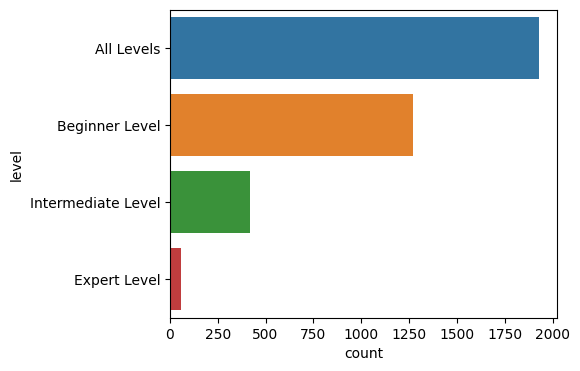

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(y='level', data=course, order=course.level.value_counts().index)

{'Business Finance': 75902, 'Web Development': 430025, 'Musical Instruments': 31724, 'Graphic Design': 37070}


<Axes: xlabel='value'>

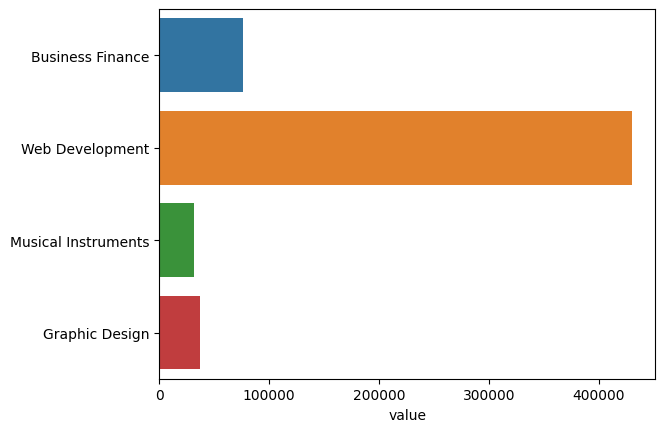

In [21]:
data = {i:0 for i in set(course.subject.values)}
course_data = course[['subject', 'num_reviews']]
for index, row in course_data.iterrows():
    data[row.subject] += row.num_reviews
print(data)
df = pd.DataFrame.from_dict(data, orient='index', columns=['value'])
sns.barplot(y=df.index, x = 'value', data=df)

<Axes: xlabel='price', ylabel='num_subscribers'>

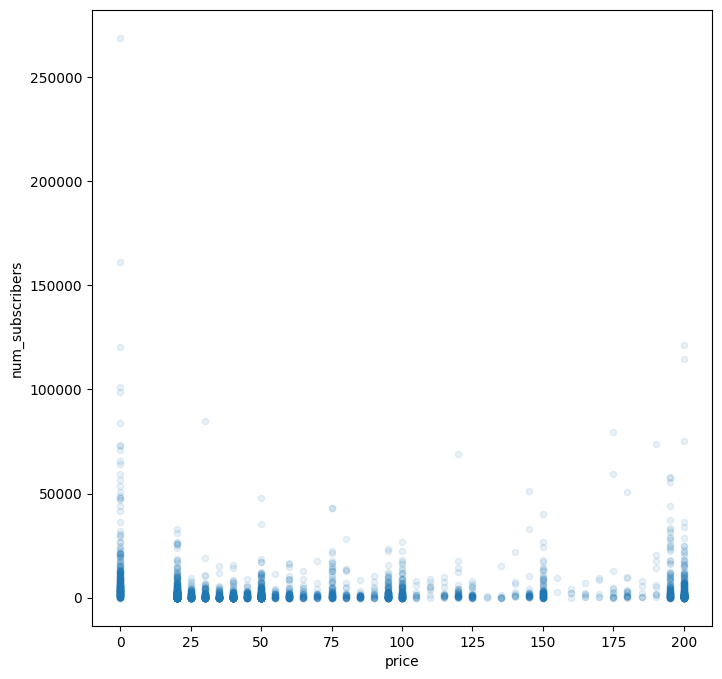

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
course.plot.scatter(
    x = 'price',
    y = 'num_subscribers',
    alpha = .1,
    ax=ax
)

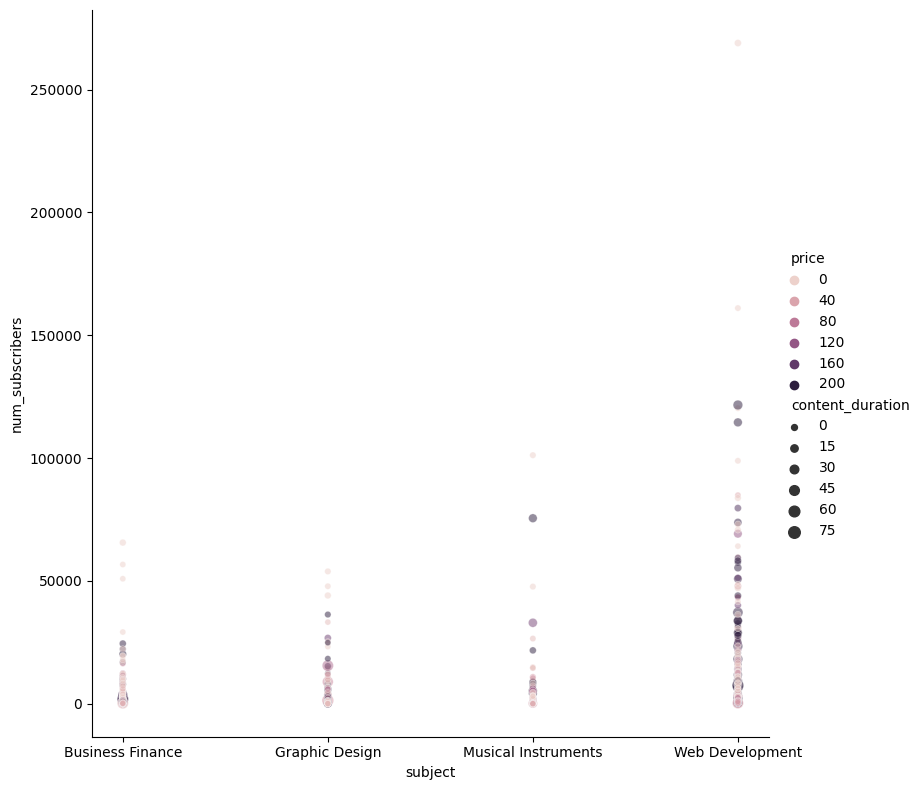

In [23]:
sns.relplot(
    x='subject',
    y='num_subscribers',
    data=course,
    hue='price',
    size='content_duration',
    alpha=.5,
    height=8
)

In [24]:
course_time = course.sort_values('published_timestamp')
course_grouped = course_time.groupby('subject').apply(lambda x: x.set_index('published_timestamp')['num_subscribers'].cumsum()).reset_index()
course_grouped = course_grouped.rename(columns={0: 'cumulate_subscribers'})

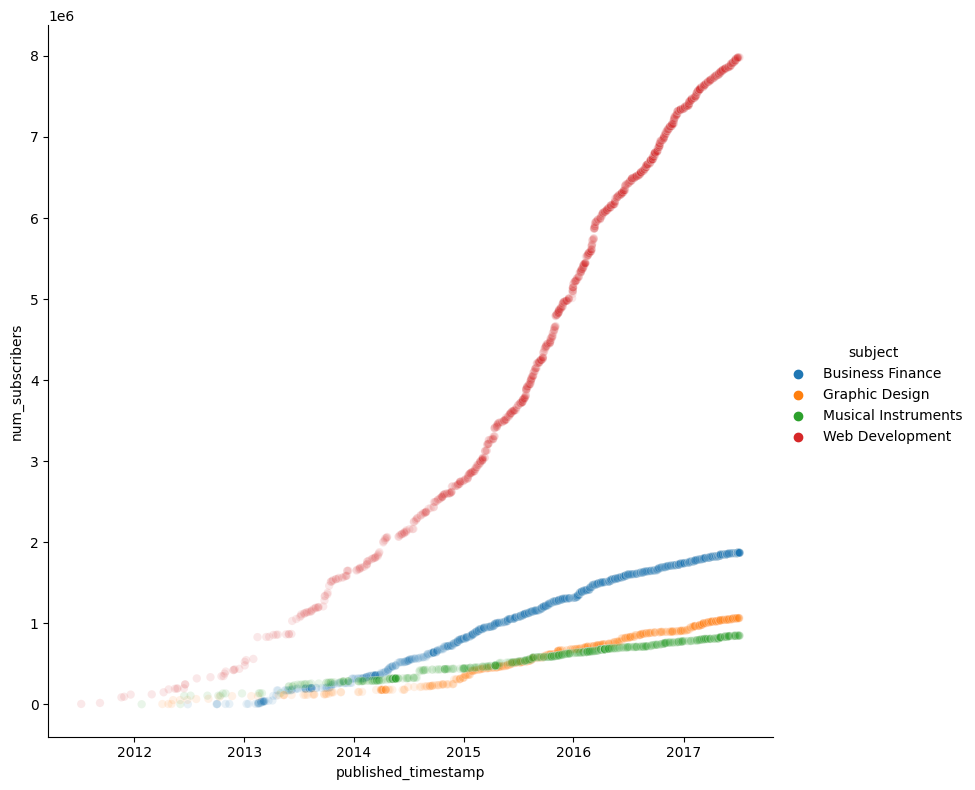

In [25]:
sns.relplot(
    x='published_timestamp',
    y='num_subscribers',
    data=course_grouped,
    hue='subject',
    alpha=.1,
    height=8
)

# 추가할 것
시간에 따른 누적 구독자수를 했으니까
이거 미분해서 시간에 따른 누적 구독자 증가율을 구해서 Trand 구하기! 캬 미쳤다
시간에 따른 누적 수익 통계

## 주제별 시간에 따른 누적 구독자수
### Web Development
**Web Development**는 2011부터 누적 구독자 수 1위를 차지하고 있다. 최근까지도 구독자가 느는 속도가 가장 빠르다.
### Business Finance
**Business Finance**는 2014년정도를 기준으로 2위였던 Musical Instruments를 제치고 2위를 차지했다.
### Graphic Design
**Graphic Design**또한 2015년쯤 기준으로 3위였던 Musical Instruments를 제치고 3위를 달성했다.
### Musical Instruments
**Busuness Finance**와 Graphic Design과 경쟁하던 Musical Instruments는 지속적으로 인기를 잃고 있다.

In [26]:
#course_time[['published_timestamp', 'subject', 'cumulate_subscribers']]
course.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [27]:
a = 0 if False else 1
print(a)

1


In [28]:
course['log_subscribers'] = course['num_subscribers'].apply(lambda x: np.log10(x if x != 0 else 1))
course['log_reviews'] = course['num_reviews'].apply(lambda x: np.log10(x if x != 0 else 1))
course['published_str'] = course['published_timestamp'].apply(lambda x: int(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').timestamp()))

# 주제별 구독자 수에 따른 리뷰 수
log함수로 보기 쉽게 만들었다.

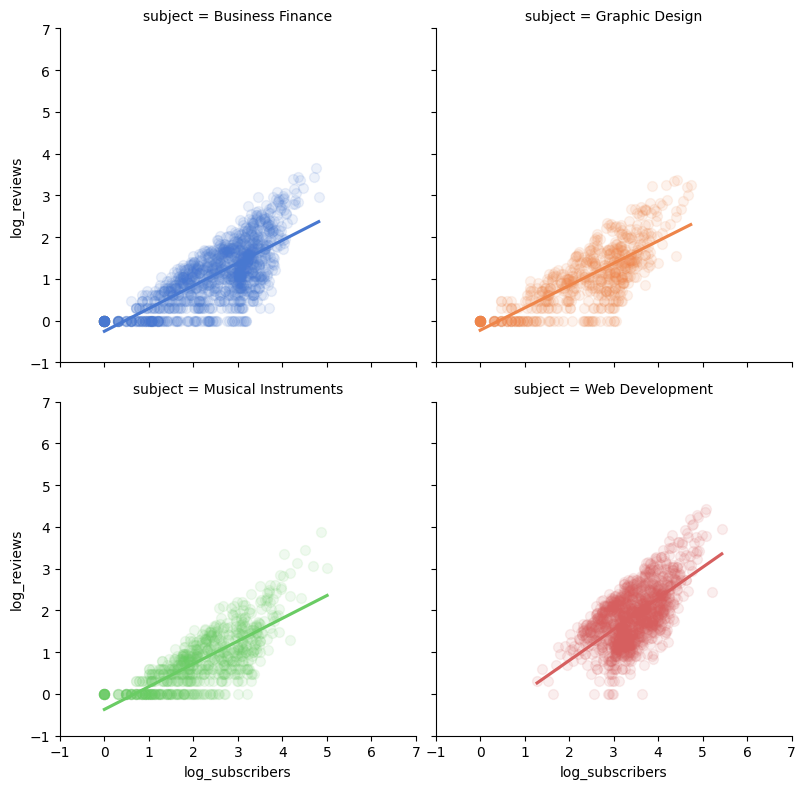

In [29]:

g = sns.lmplot(
    data=course,
    x="log_subscribers",
    y="log_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)
g.set(xlim=(-1, 7), ylim=(-1, 7))

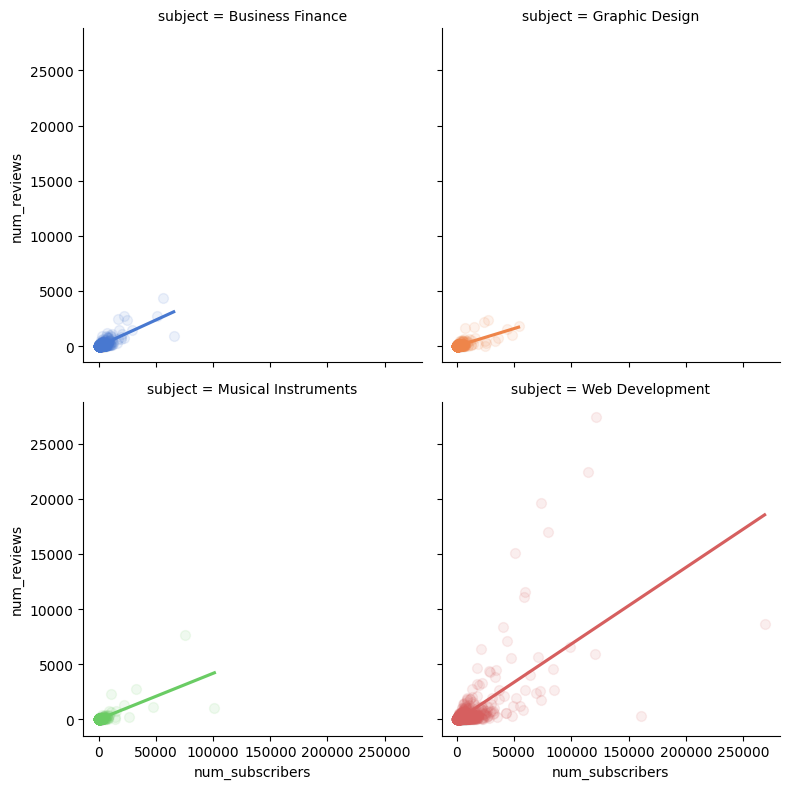

In [30]:

sns.lmplot(
    data=course,
    x="num_subscribers",
    y="num_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

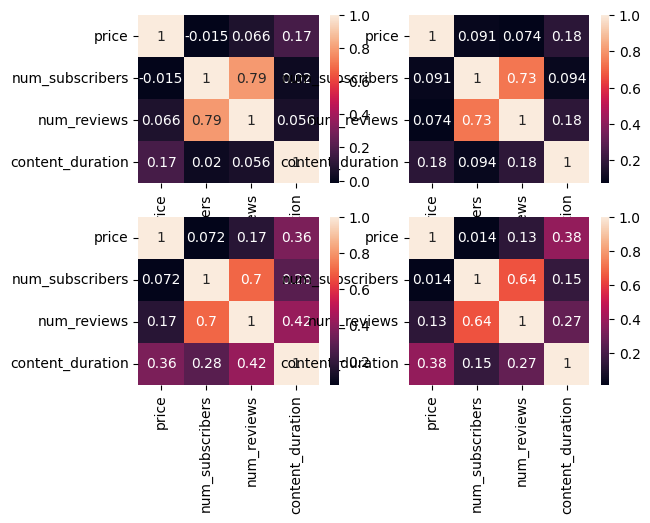

In [31]:
# stats.pearsonr(
#     course.num_reviews.values, 
#     course.num_subscribers.values
# )
# sns.heatmap(course.corr(), annot=True)
col = ['price', 'num_subscribers','num_reviews', 'content_duration']
subjects = ['Business Finance',
 'Graphic Design',
 'Musical Instruments',
 'Web Development']
# print(course.columns) # 
fig, ax = plt.subplots(ncols=2, nrows=2)
for sub_len in range(len(subjects)):
    sub=subjects[sub_len]
    sns.heatmap(course[course['subject'].isin([sub])][col].corr(), annot=True, ax=ax[sub_len//2,sub_len%2])
# sns.heatmap(course[course['subject'].isin([subjects[0]])][col].corr(), annot=True)

# 분석 결과
가격에 대한 상관계수는 대부분 높지 않았다.

그나마 가장 높은 것이 콘텐츠 길이라고 할 수 있다.

In [32]:
course.num_subscribers.describe().T

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

In [33]:
np.log10(3)

0.47712125471966244

In [34]:
course.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'log_subscribers',
       'log_reviews', 'published_str'],
      dtype='object')

In [35]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3678 non-null   int32         
 1   course_title         3678 non-null   object        
 2   url                  3678 non-null   object        
 3   is_paid              3678 non-null   bool          
 4   price                3678 non-null   int16         
 5   num_subscribers      3678 non-null   int32         
 6   num_reviews          3678 non-null   int16         
 7   num_lectures         3678 non-null   int16         
 8   level                3678 non-null   category      
 9   content_duration     3678 non-null   float16       
 10  published_timestamp  3678 non-null   datetime64[ns]
 11  subject              3678 non-null   category      
 12  log_subscribers      3678 non-null   float64       
 13  log_reviews          3678 non-nul

## 주제 별 강좌 지불 분석



### 1.  모든 level 별 강좌 지불

In [36]:
course.describe().T

,count,mean,min,25%,50%,75%,max,std
course_id,3678.0,675971.963295,8324.0,407692.5,687917.0,961355.5,1282064.0,343273.15604
price,3678.0,66.049483,0.0,20.0,45.0,95.0,200.0,61.005755
num_subscribers,3678.0,3197.150625,0.0,111.0,911.5,2546.0,268923.0,9504.11701
num_reviews,3678.0,156.259108,0.0,4.0,18.0,67.0,27445.0,935.452044
num_lectures,3678.0,40.108755,0.0,15.0,25.0,45.75,779.0,50.383346
content_duration,3678.0,4.09375,0.0,1.0,2.0,4.5,78.5,6.054688
published_timestamp,3678,2015-11-26 14:17:16.067699968,2011-07-09 05:43:31,2015-03-16 19:01:45.500000,2016-01-27 18:10:50,2016-10-29 21:19:39.750000128,2017-07-06 21:46:30,NaN
log_subscribers,3678.0,2.689503,0.0,2.045323,2.959757,3.405858,5.429628,1.055564
log_reviews,3678.0,1.269897,0.0,0.60206,1.255273,1.826075,4.438463,0.834861
published_str,3678.0,1448515036.0677,1310157811.0,1426500105.5,1453885850.0,1477743579.75,1499345190.0,35876383.926989


# 분석
주제와 레벨별 가격에 따른 강좌 개수의 통계

{<seaborn.axisgrid.FacetGrid at 0x2347fe97e80>}

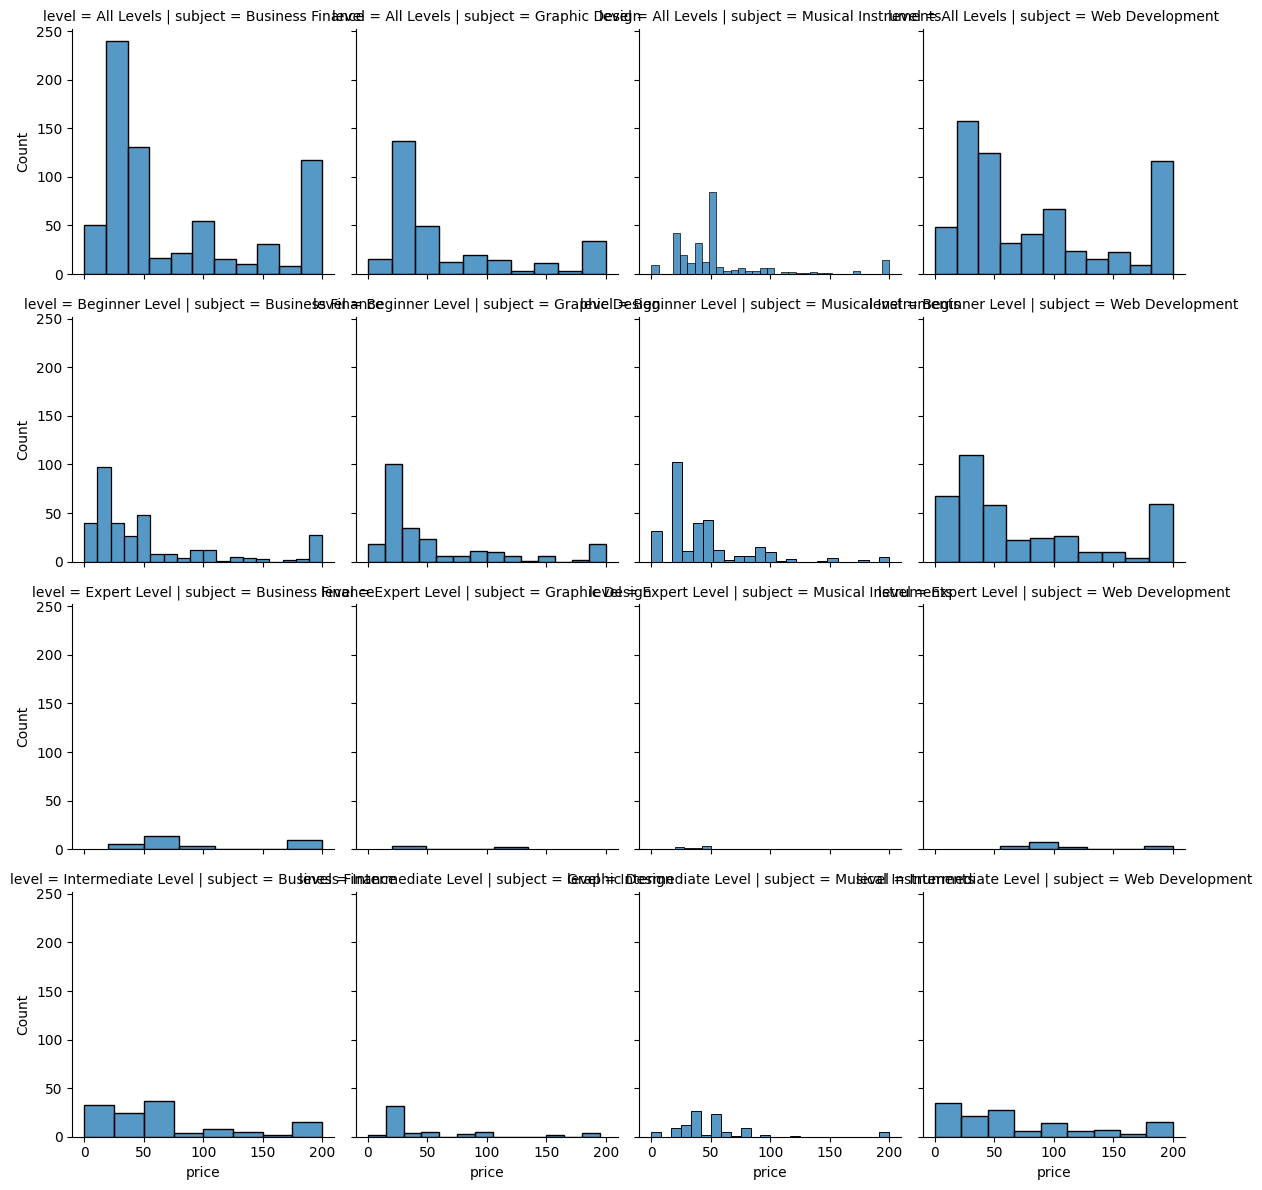

In [37]:
{
    sns.FacetGrid(course, col = 'subject', row = 'level', palette="tab20c")
        .map(sns.histplot, 'price')
}

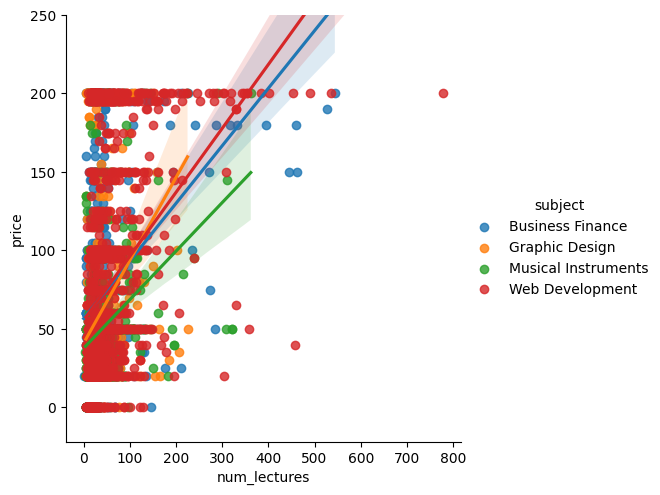

In [38]:
sns.lmplot(x = 'num_lectures', y = 'price', data = course, hue = 'subject').set(ylim=(None, 250))

# Level에 따른 가격 차이를 주제와 비교
가격의 최대 값은 차이가 없다.

Level이 올라갈 수록 높은 가격이 요구된다. 

또한 Expert Level에서는 무료 강의가 없는 것을 볼 수 있다.

<Axes: xlabel='level', ylabel='price'>

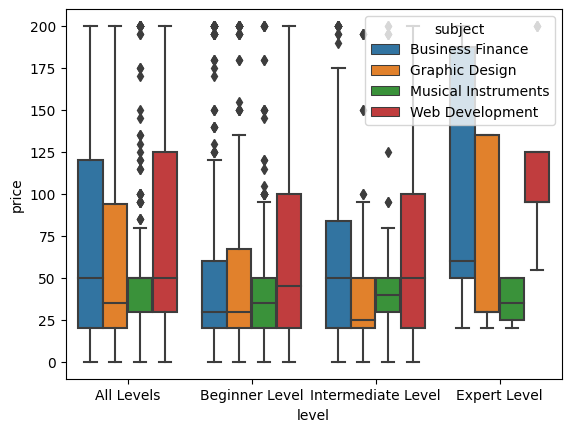

In [39]:
sns.boxplot(data = course, x='level', y='price', hue='subject', order=['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level'])

# 주제별 가격에 따른 리뷰수
낮은 상관관계를 보인다.

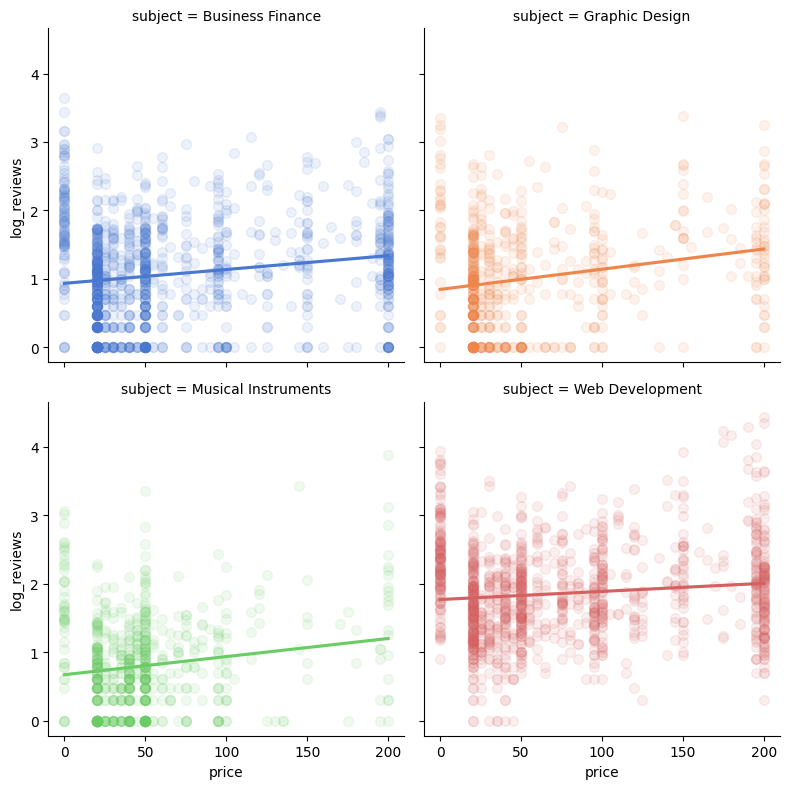

In [40]:
sns.lmplot(
    data=course,
    x="price",
    y="log_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

<Axes: xlabel='subject', ylabel='count'>

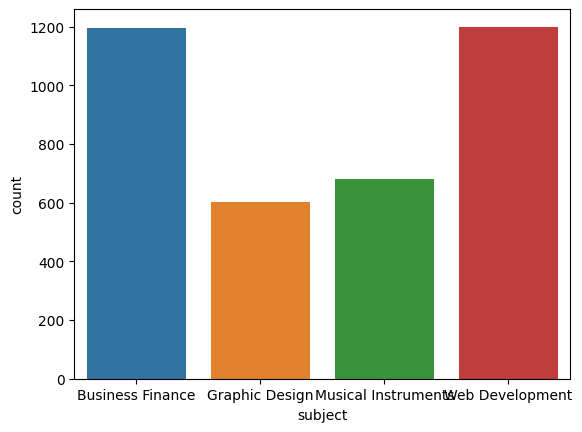

In [41]:
sns.countplot(x='subject', data=course)

# 가장 많은 강좌
Business Finance와 Web Development가 가장 대중적인 강좌라고 할 수 있다.

# 가격별 강좌 길이

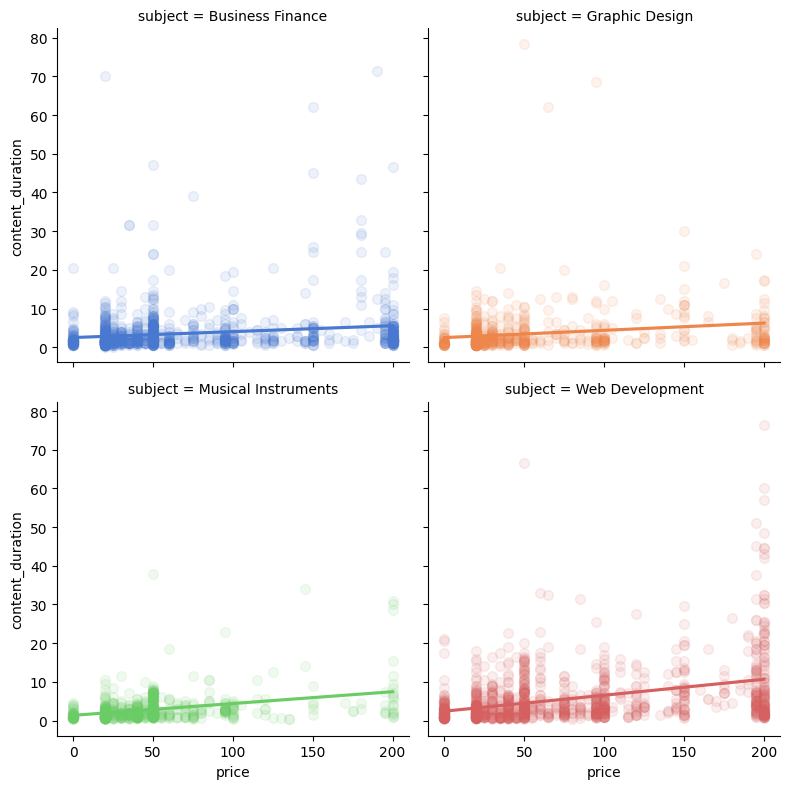

In [42]:
sns.lmplot(
    data=course,
    x="price",
    y="content_duration", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

# 수익 column 추가

In [43]:
course['earning'] = course['price']*course['num_subscribers']

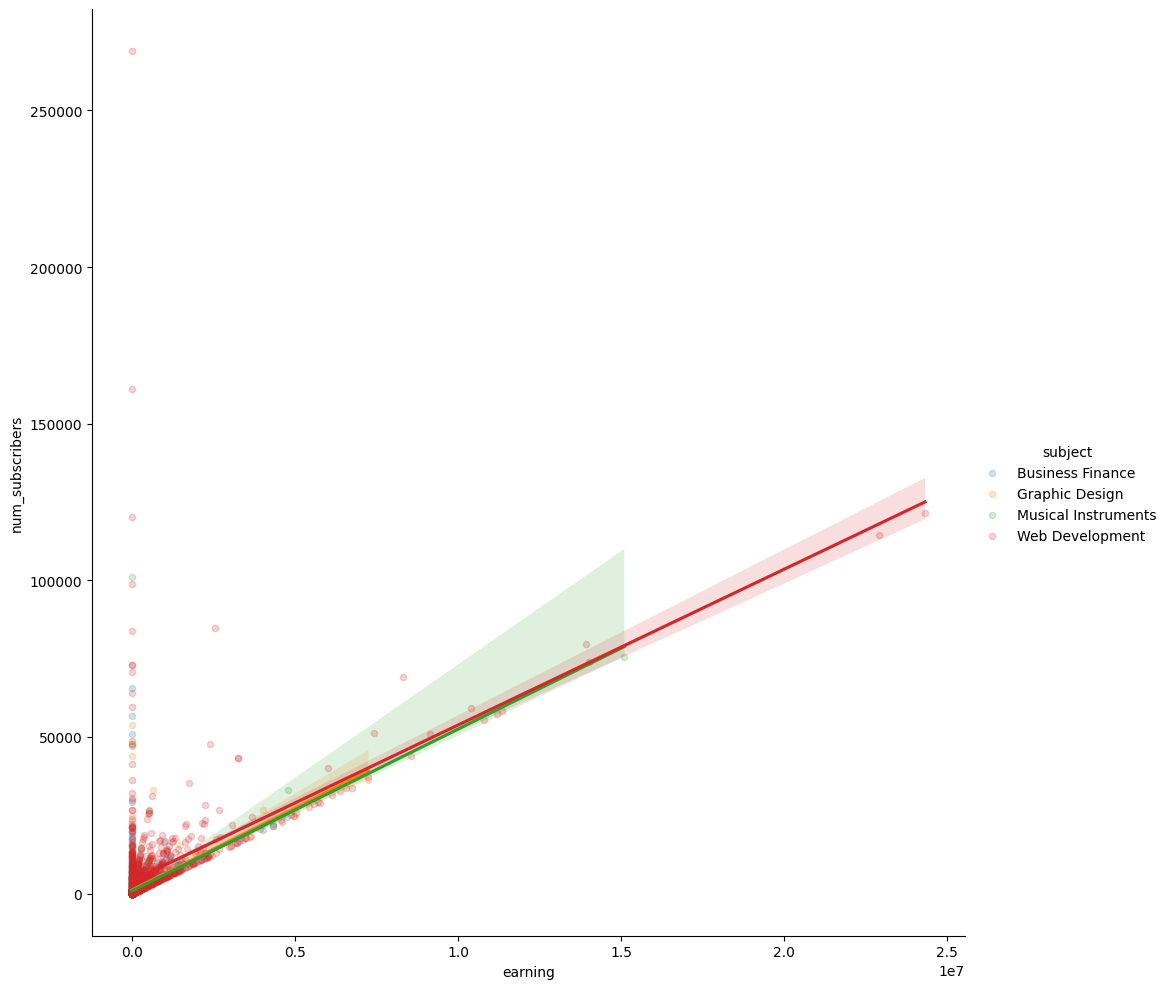

In [44]:
# fig, ax = plt.subplots(figsize=(10, 10))
sns.lmplot(data=course, x='earning', y='num_subscribers', scatter_kws={"s": 20, "alpha": .2}, hue='subject', height=10)

# 수익

Web Development 분야에서 가장 많은 수익이 난다.

<Axes: xlabel='level', ylabel='earning'>

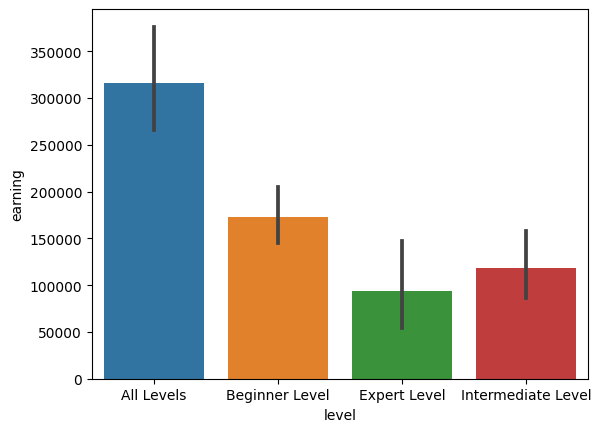

In [45]:
sns.barplot(x='level', y='earning', data=course)

<Axes: xlabel='subject', ylabel='earning'>

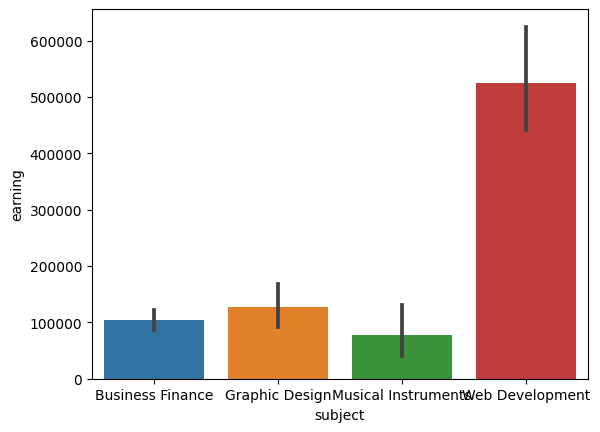

In [46]:
sns.barplot(x='subject', y='earning', data=course)

In [71]:
import random

In [109]:
# size = int(len(course)*1)
# random_index_list = random.sample(range(0, len(course)), size) # 전체의 30%를 표본조사
# size

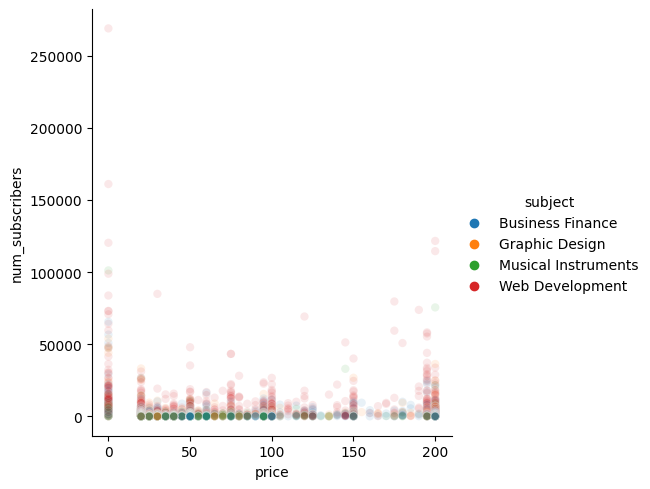

In [124]:
course_earning = course.sort_values(by='earning', ascending=False)
course_earning.earning = course_earning['earning'].clip(0, 1000000)
webdev = course_earning.subject.isin(['Business Finance'])
# course_earning = course_earning[webdev]
# fig, ax = plt.subplots(figsize=(10, 10))
sns.relplot(data=course_earning, y='num_subscribers', x='price', hue='subject', alpha=.1)

In [111]:
course_earning

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,log_subscribers,log_reviews,published_str,earning
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27,Web Development,5.084876,4.438463,1446466407,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36,Web Development,5.058851,4.350481,1457443716,22902400
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51,Musical Instruments,4.877941,3.885135,1407360471,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29,Web Development,4.867956,4.293340,1455143369,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54,Web Development,4.900979,4.229835,1426169994,13932100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.5,2017-04-23 16:19:01,Business Finance,0.000000,0.000000,1492931941,0
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.5,2017-07-06 21:46:30,Business Finance,0.000000,0.000000,1499345190,0
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.0,2017-07-03 21:40:32,Business Finance,0.000000,0.000000,1499085632,0
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.0,2017-06-29 22:01:56,Business Finance,0.000000,0.000000,1498741316,0
